<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **시각화 라이브러리 ② - Seaborn**



- Seaborn은 파이썬 시각화 라이브러리 중 하나입니다.
- Matplotlib 기반으로 작성된 고수준 인터페이스를 제공하여 쉽게 시각화할 수 있도록 도와줍니다.
- Matplotlib보다 훨씬 간편하고 직관적인 API를 제공합니다.
- 이를 통해 통계 그래픽을 생성하는 데 필요한 많은 작업을 단순화할 수 있습니다.
- Matplotlib과 함께 사용되는 것이 일반적입니다.
- Matplotlib에서 지원하지 않는 색상 팔레트, 테마 등을 제공합니다.
- Matplotlib보다 훨씬 다양한 스타일과 테마를 지원하며, 더욱 효과적인 시각화를 가능하게 합니다.

## **1. 환경준비**

- 이후 사용할 기본 라이브러를 불러오고 분석 대상 데이터를 읽어옵니다.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [43]:
# Titanic 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.dropna(inplace=True)  # 결측치 제거

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


**📋 데이터 정보**

- PassengerId : 승객 번호
- Survived : 생존 여부(1:생존, 0:사망)
- Pclass : 객실 등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객 이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선 지역(Southampton, Cherbourg, Queenstown)

In [44]:
# Iris 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
iris = pd.read_csv(path)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**📋 데이터 정보**

- Sepal.Length: 꽃받침의 길이
- Sepal.Width: 꽃받침의 너비
- Petal.Length: 꽃잎의 길이
- Petal.Width: 꽃잎의 너비


## **2. 기본 그래프**

- 우선 가장 일반적인 차트 기능부터 살펴봅니다.

### **2.1. Histogram**

- **histplot()** 함수는 단일 변수의 데이터 분포를 Histogram으로 표시합니다.
- **hue** 매개변수를 사용하여 구분 기준이 되는 범주형 변수를 지정할 수도 있습니다.

- Age 열 데이터 분포를 Histogram으로 확인해 봅니다.

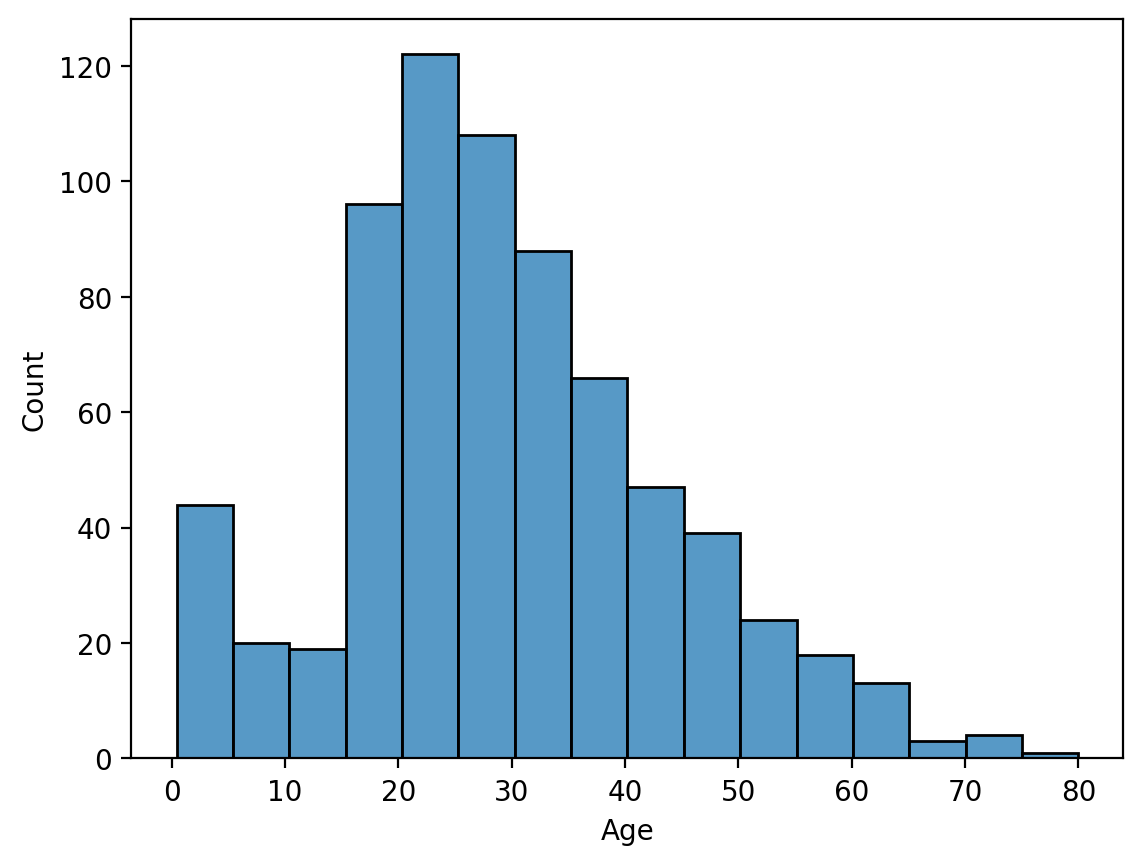

In [45]:
sns.histplot(x='Age', data=titanic, bins=16, edgecolor='k')
plt.show()

- Age 열 데이터 분포를 Survived 열을 기준으로 구분해 확인해 봅니다.

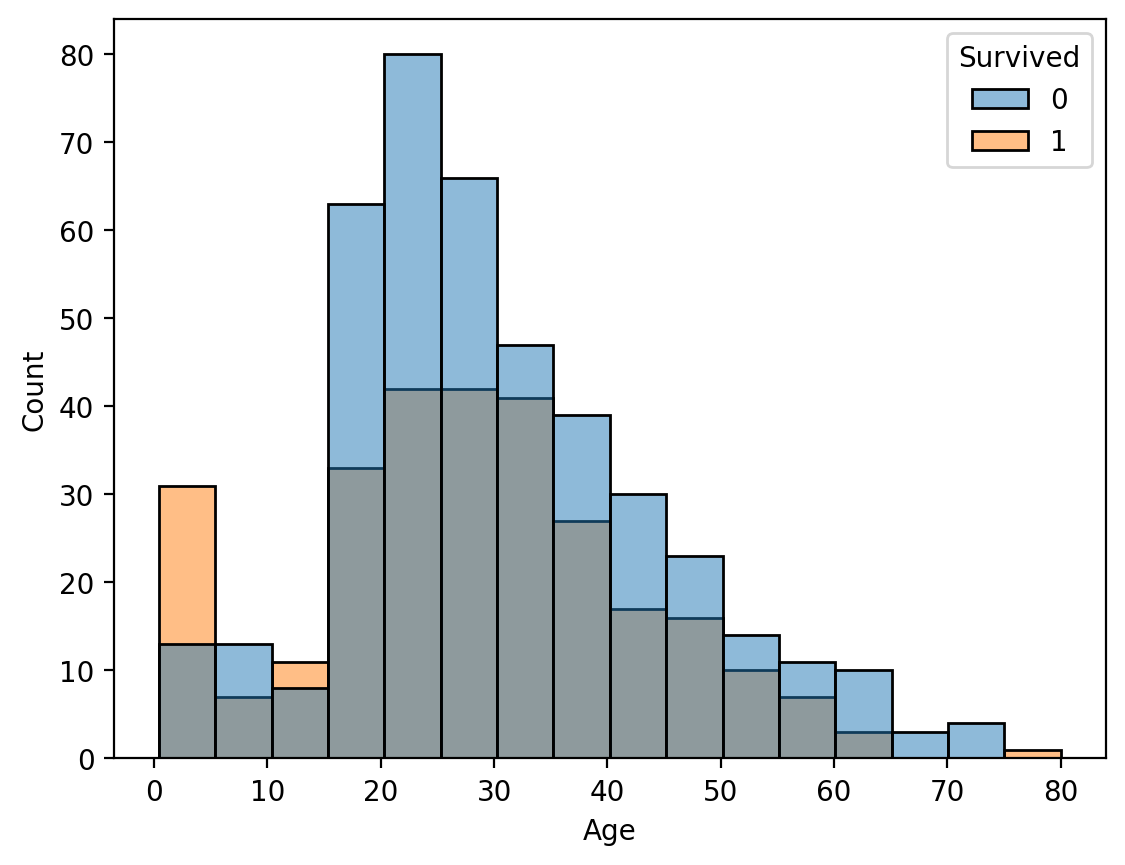

In [46]:
sns.histplot(x='Age', hue='Survived', data=titanic, bins=16, edgecolor='k')
plt.show()

### **2.2. Density Plot**

- **kdeplot()** 함수는 단일 변수 또는 두 변수의 데이터 분포를 Density Plot으로 표시합니다.
- 숫자형 변수의 값 분포를 확인할 수 있는 커널밀도함수(KDE, Kernel Density Estimation) 그래프를 표시합니다.
- 그래프 아래의 면적이 1이 됩니다.
- x와 y 매개변수 중 하나를 사용하여 변수를 지정해 표시되는 방향을 조정합니다.
- hue 매개변수를 사용하여 구분 기준이 되는 범주형 변수를 지정할 수 있습니다.

- Age 변수의 데이터 분포를 Density Plot으로 확인해 봅니다.

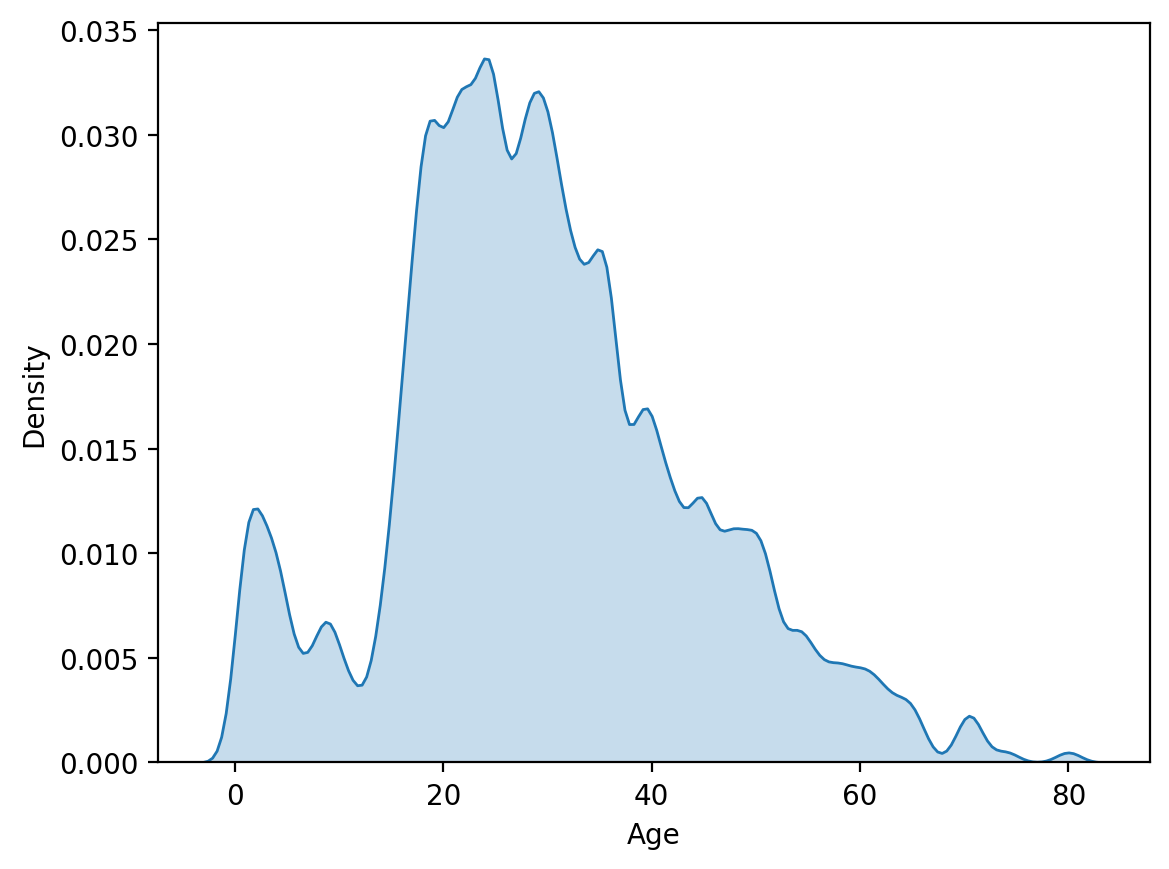

In [47]:
sns.kdeplot(x='Age', data=titanic, bw_adjust=0.3, fill=True)
plt.show()

- Age 변수의 데이터 분포를 Survived 열을 기준으로 구분해 확인해 봅니다.
- **common_norm=False**를 지정하면 그래프 각각의 면적이 1이 됩니다.

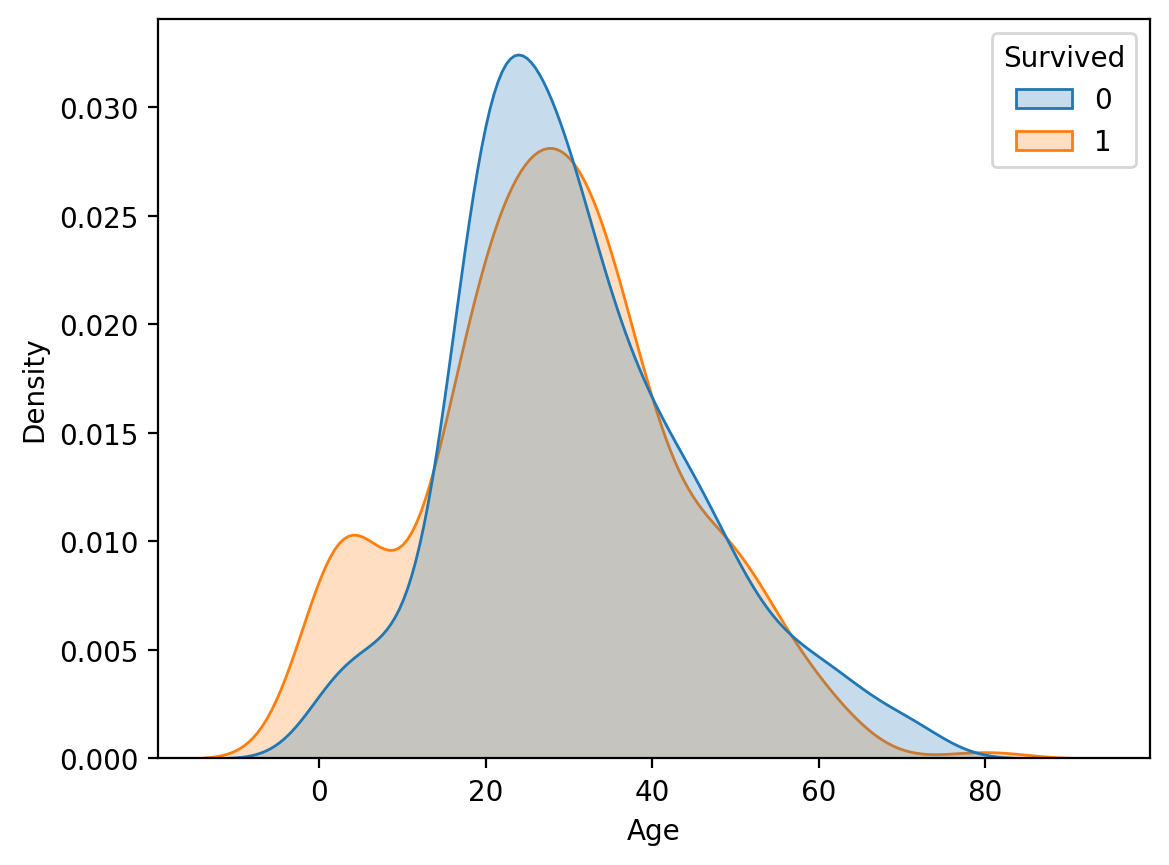

In [48]:
sns.kdeplot(x='Age', hue='Survived', data=titanic, common_norm=False, fill=True)
plt.show()

- **common_norm=True**를 지정하면 두 그래프 면적의 합이 1이 됩니다.

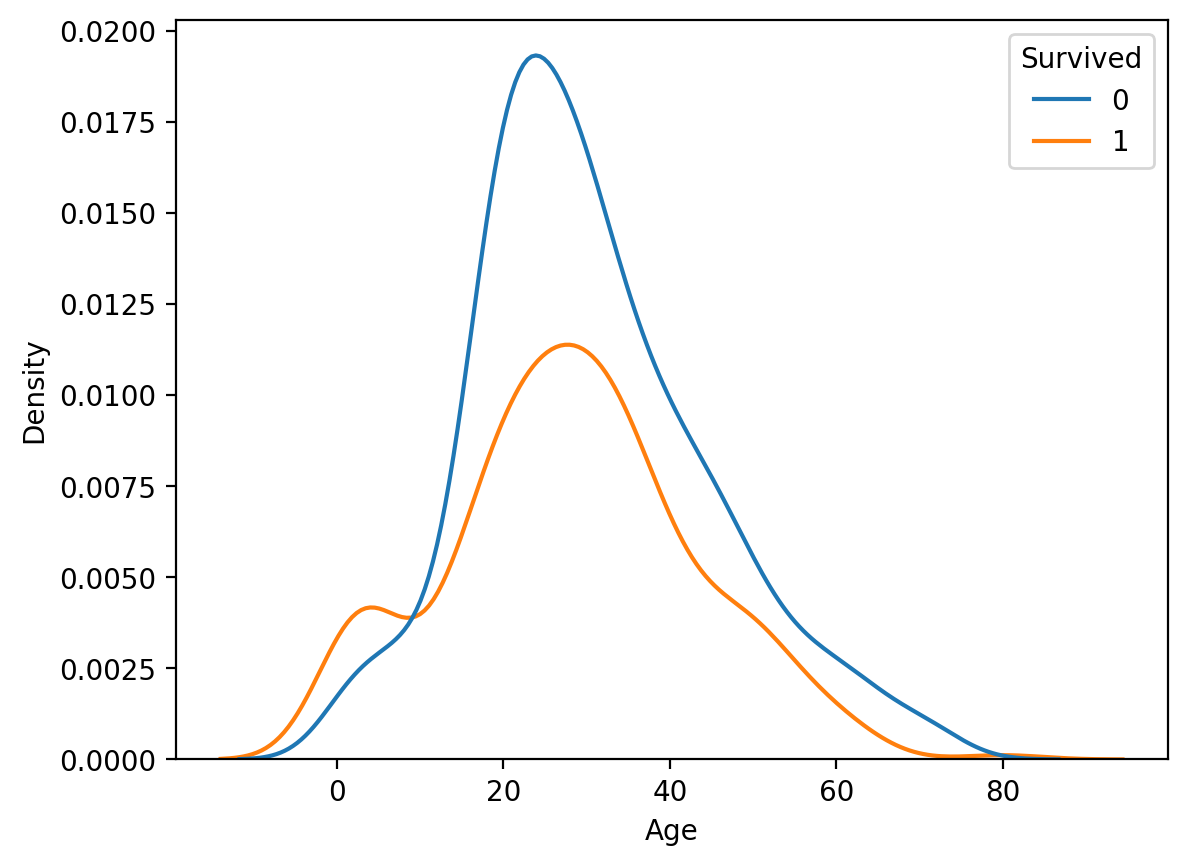

In [49]:
sns.kdeplot(x='Age', hue='Survived', data=titanic, common_norm=True)
plt.show()

### **2.3. Box Plot**

- **boxplot()** 함수는 단일 변수나 여러 변수의 분포를 Box Plot으로 표시합니다.
- 변수의 분포와 이상치(Outlier)를 시각적으로 탐색할 수 있습니다.
- boxplot() 함수는 x와 y 매개변수 중 하나를 사용하여 변수를 지정합니다.
-  hue 매개변수를 사용하여 구분 기준이 되는 범주형 변수를 지정할 수 있습니다.

- Age 변수의 데이터 분포를 Box Plot으로 확인해 봅니다.
- y 축에 대상 열을 지정하면 세로 형태로 표시됩니다.

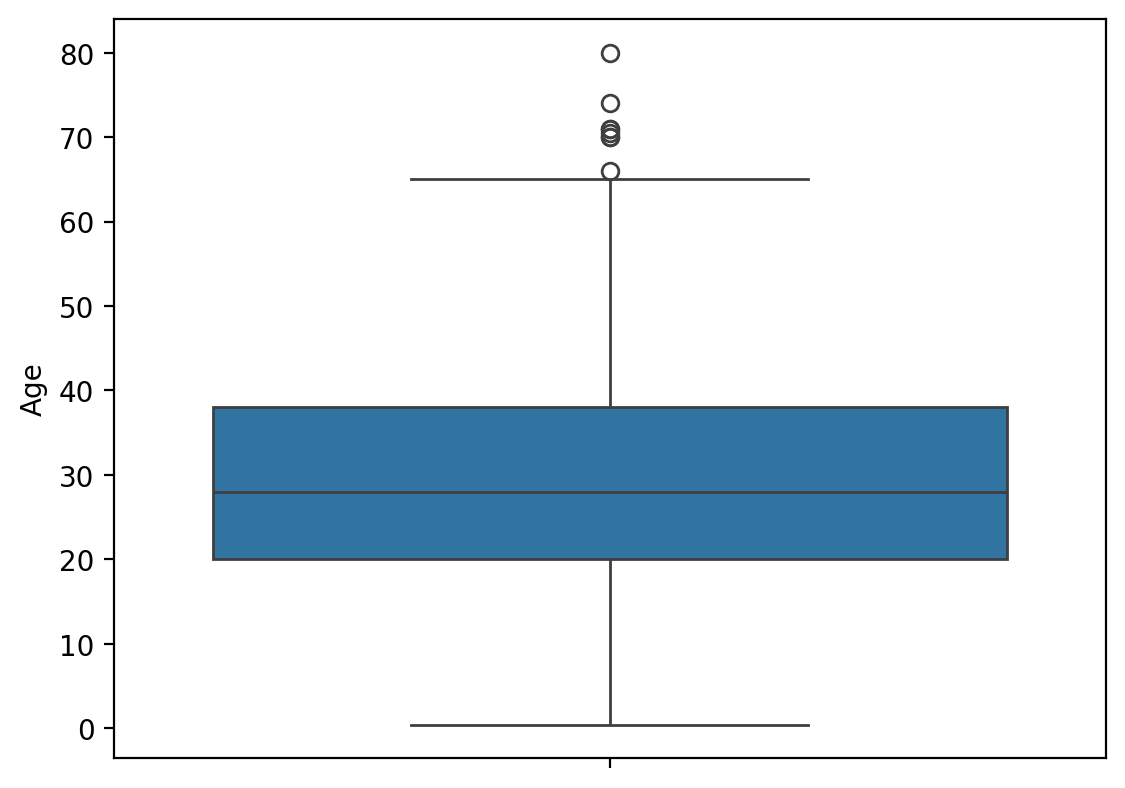

In [50]:
sns.boxplot(y='Age', data=titanic)
plt.show()

- Age 변수의 데이터 분포를 Survived 열을 기준으로 구분해 확인해 봅니다.
- x 축에 구분 기준이 되는 열을 지정합니다.

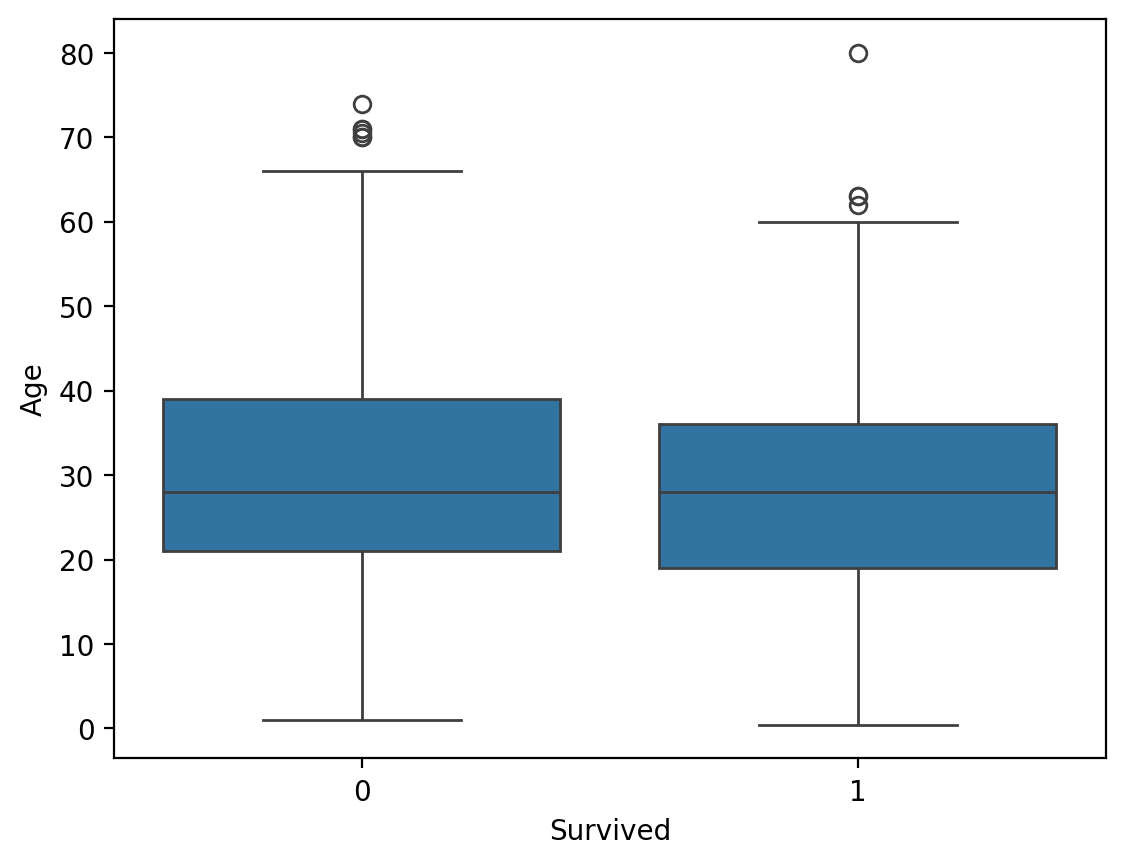

In [51]:
sns.boxplot(y='Age', x='Survived', data=titanic)
plt.show()

- x 축에 대상 열을 지정하면 가로 형태로 표시할 수 있습니다.

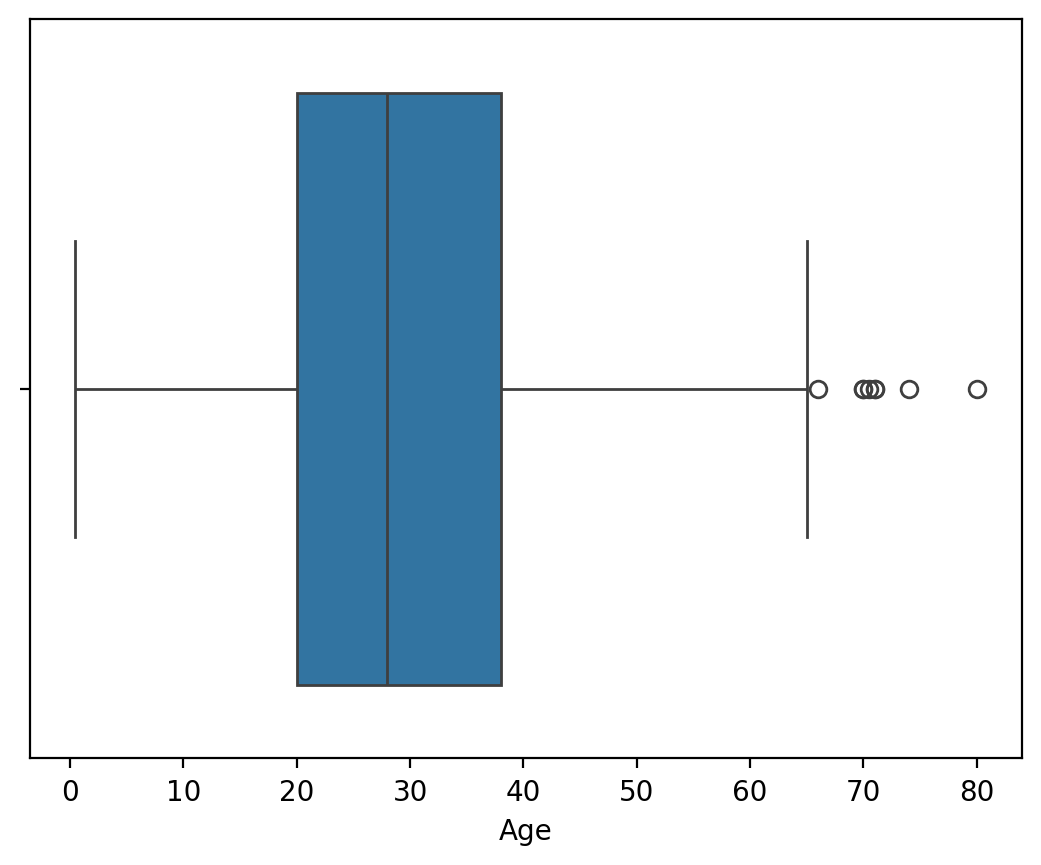

In [52]:
sns.boxplot(x='Age', data=titanic)
plt.show()

- y축에 구분 기준이 되는 열을 지정하고 **orient='h'** 를 지정합니다.

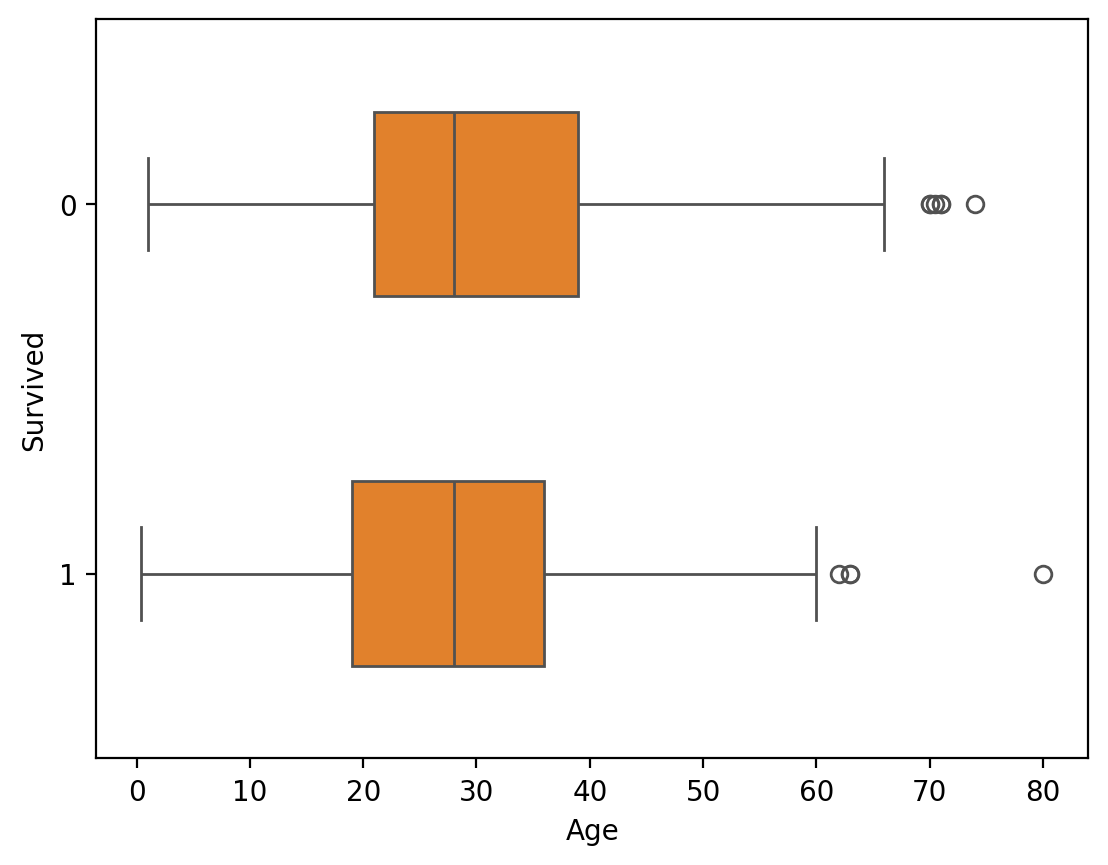

In [53]:
sns.boxplot(x='Age', y='Survived', data=titanic, orient='h', width=0.5, color='tab:orange')
plt.show()

- Box Plot의 정확한 의미는 이후에 살펴볼 예정입니다.

## **3. 고급 그래프**

- 다양한 정보를 쉽게 확인할 수 있는 멋진 그래프를 살펴봅니다.

### **3.1. Distribution Plot**

- **distplot()** 함수는 단일 변수의 분포를 시각화하기 위한 함수입니다.
- Histogram과 Density Plot을 같이 표시할 수 있습니다.
- **kde** 매개변수를 사용하여 커널밀도함수 그래프를 추가로 그릴지 여부를 지정합니다.
- **hist** 매개변수를 사용하여 히스토그램을 표시할지 여부를 결정한다.
- **rug** 매개변수를 사용하여 각 데이터 포인트의 위치를 보여주는 선을 그릴지 지정할 수 있습니다.
- **hist_kws** 매개변수에 꾸미기 위한 다양한 설정 값을 딕셔너리 형태로 전달합니다.

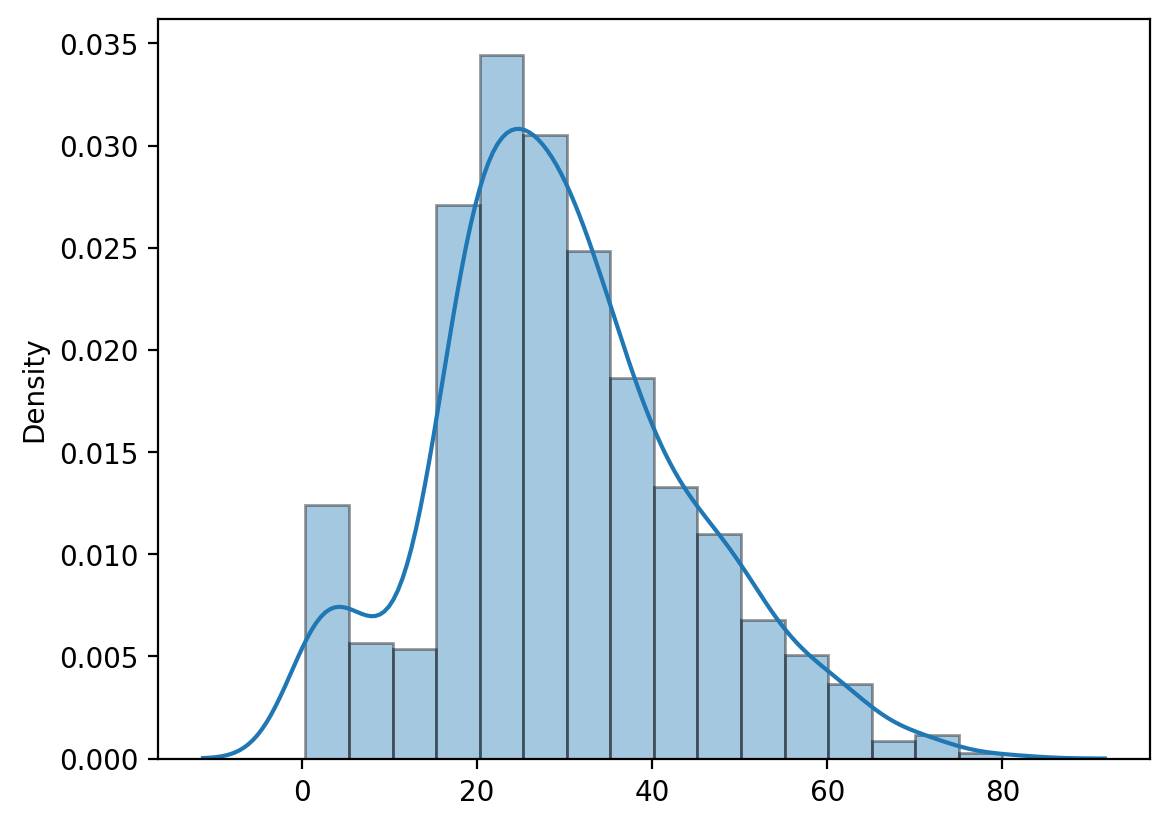

In [54]:
sns.distplot(x=titanic['Age'], bins=16, hist_kws={'edgecolor': 'k'})
plt.show()

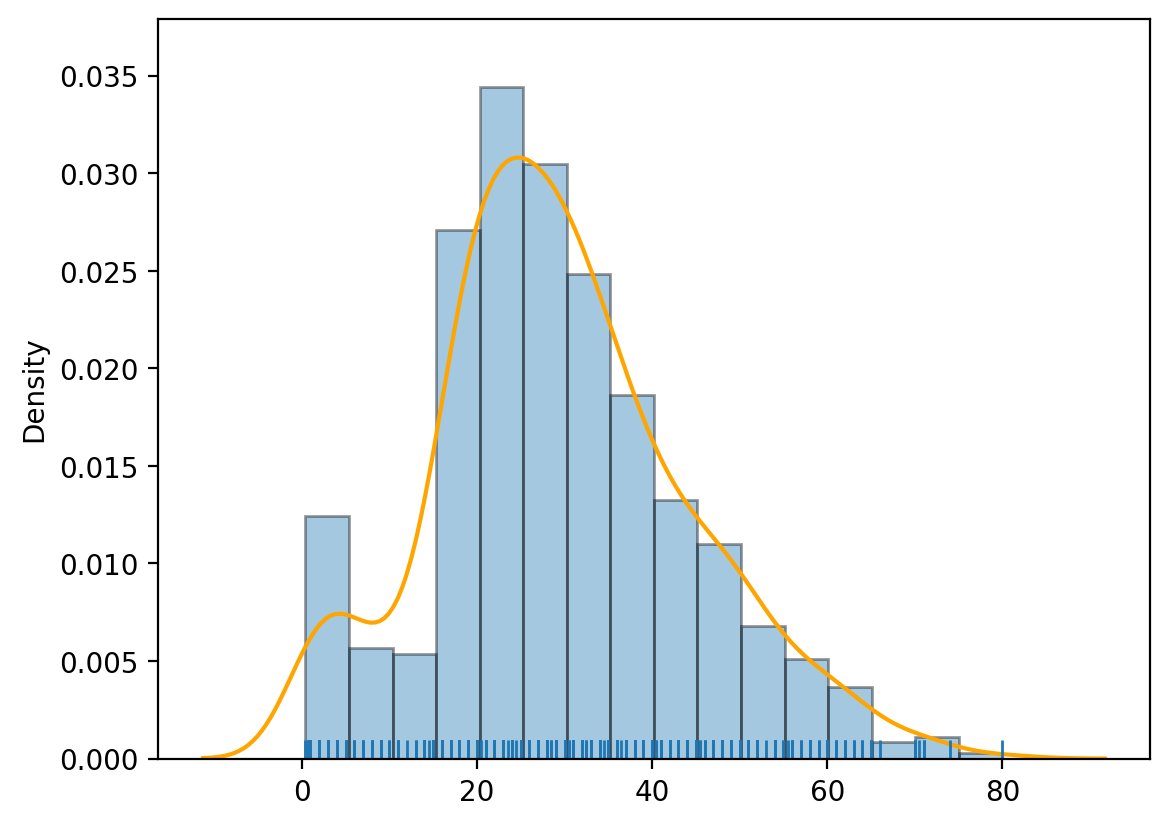

In [55]:
sns.distplot(x=titanic['Age'], bins=16, hist_kws={'edgecolor': 'k'}, kde=True, kde_kws={'color': 'orange'}, hist=True, rug=True)
plt.show()

### **3.2. Joint Plot**

- **jointplot()** 함수는 두 변수 간의 관계를 시각화하기 위해 산점도와 히스토그램을 함께 그려줍니다.
- **kind** 매개변수를 사용하여 그래프의 종류를 지정할 수 있습니다.
- **hue** 매개변수를 사용하여 구분 기준이 되는 범주형 변수를 지정할 수 있습니다.

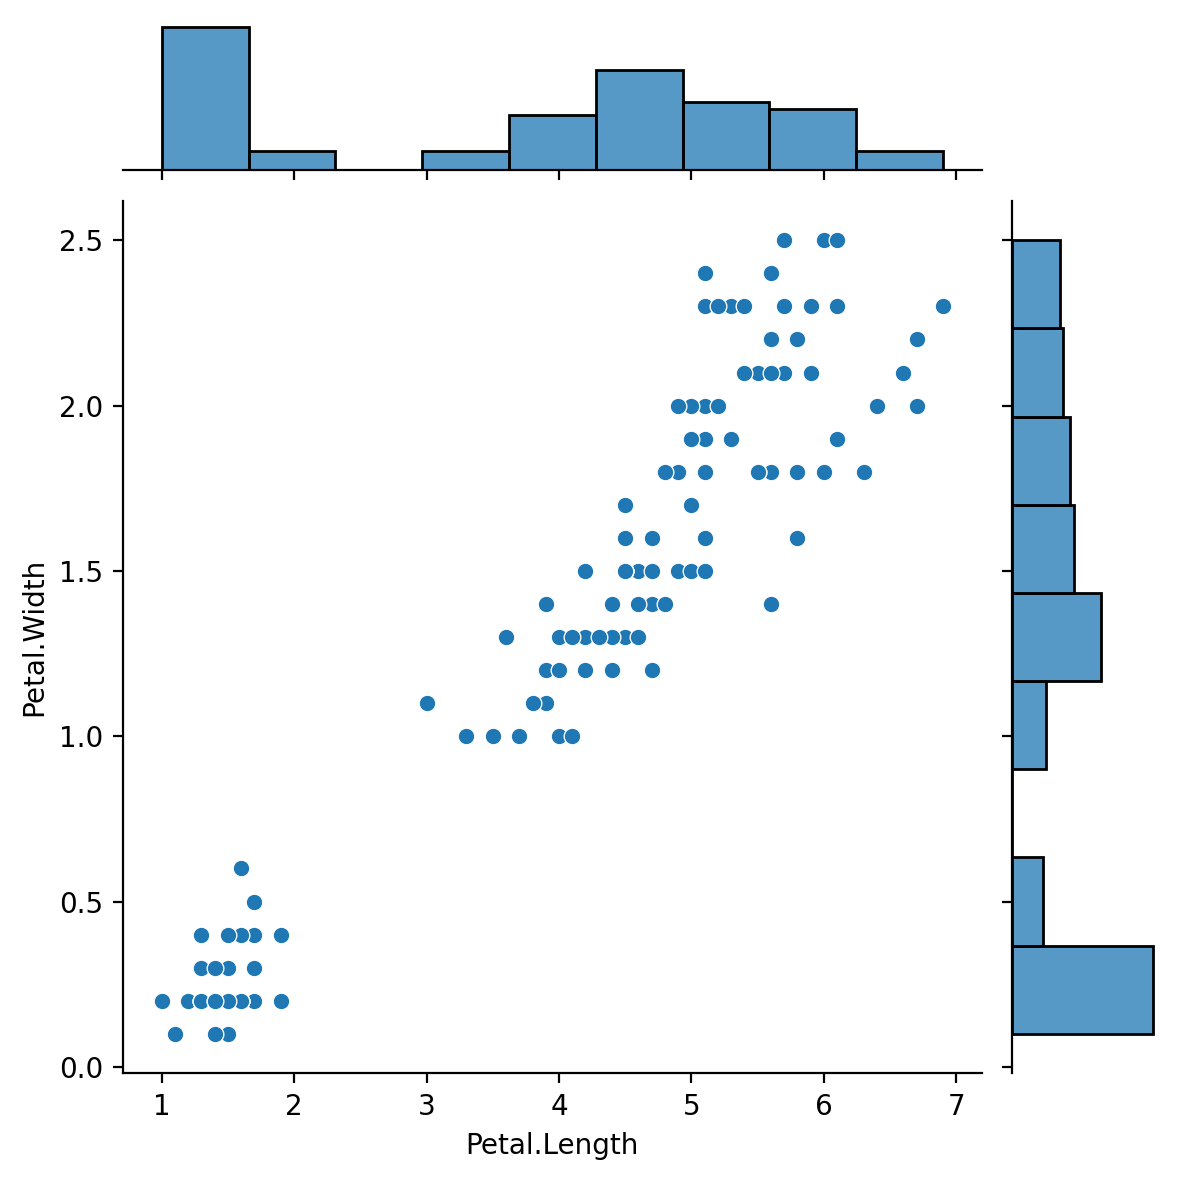

In [56]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data=iris)
plt.show()


- Seaborn의 가장 큰 특징은 hue 매개변수에 범주형 변수를 지정해 색깔을 구분해 볼 수 있다는 것입니다.
- Species 열을 구분 기준 열로 지정해 봅니다.

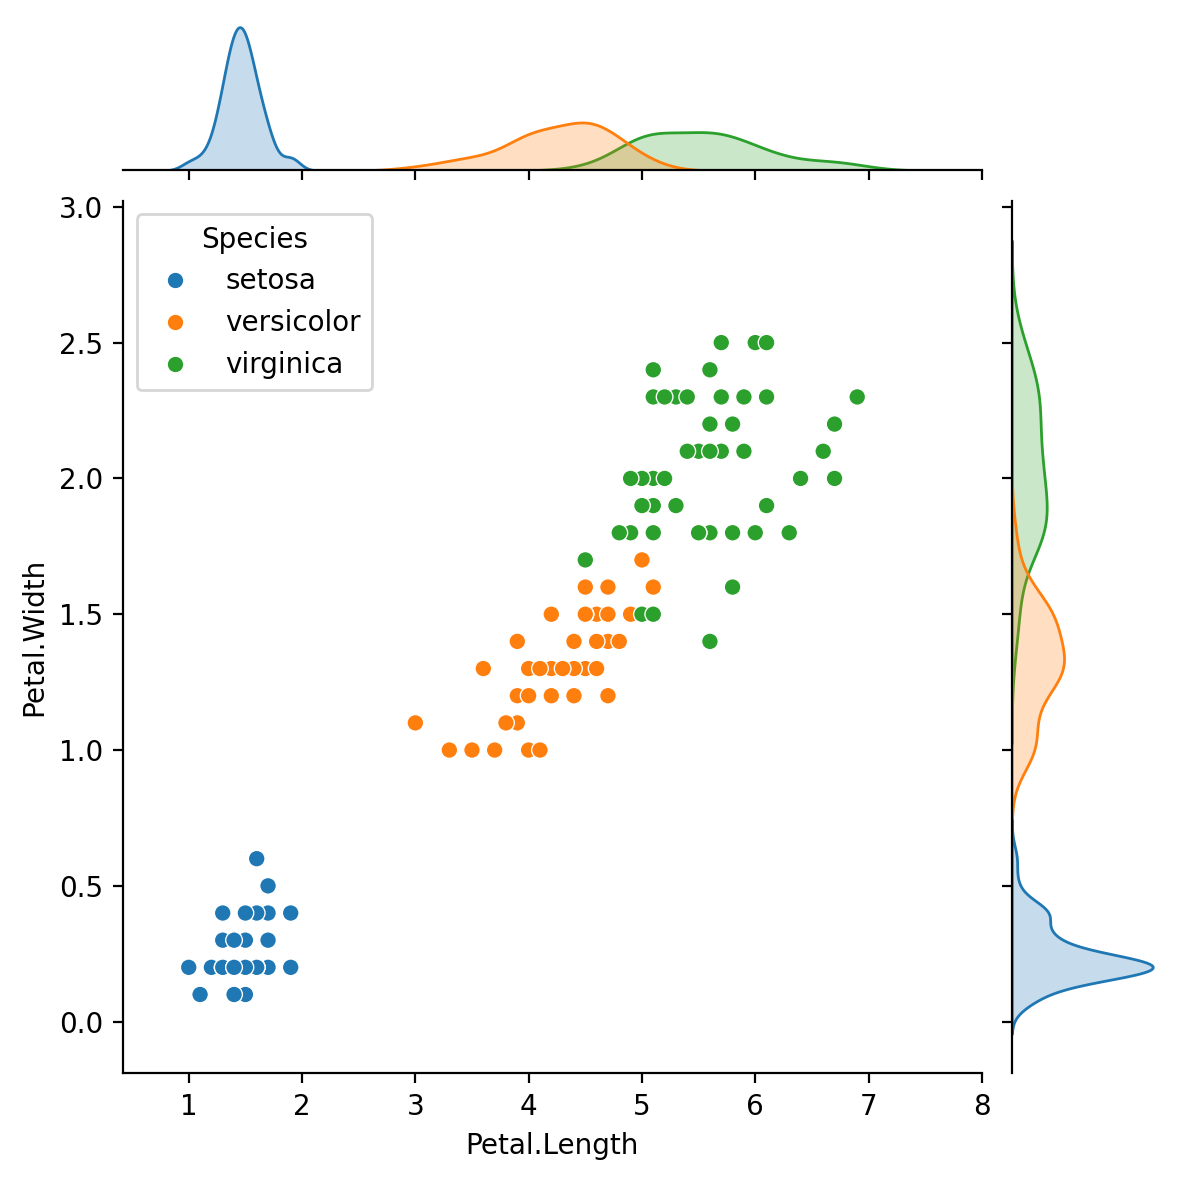

In [57]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data=iris, hue='Species')
plt.show()

### **3.3. Pair Plot**

- **pairplot()** 함수는 변수 간의 산점도 및 변수 분포를 한 번에 시각화하는 기능을 제공합니다.
- hue 매개변수를 사용하여 추가적인 범주형 변수를 지정할 수 있습니다.
- 하지만 그려지는 데 **시간이 많이 걸리는 단점**이 있습니다.

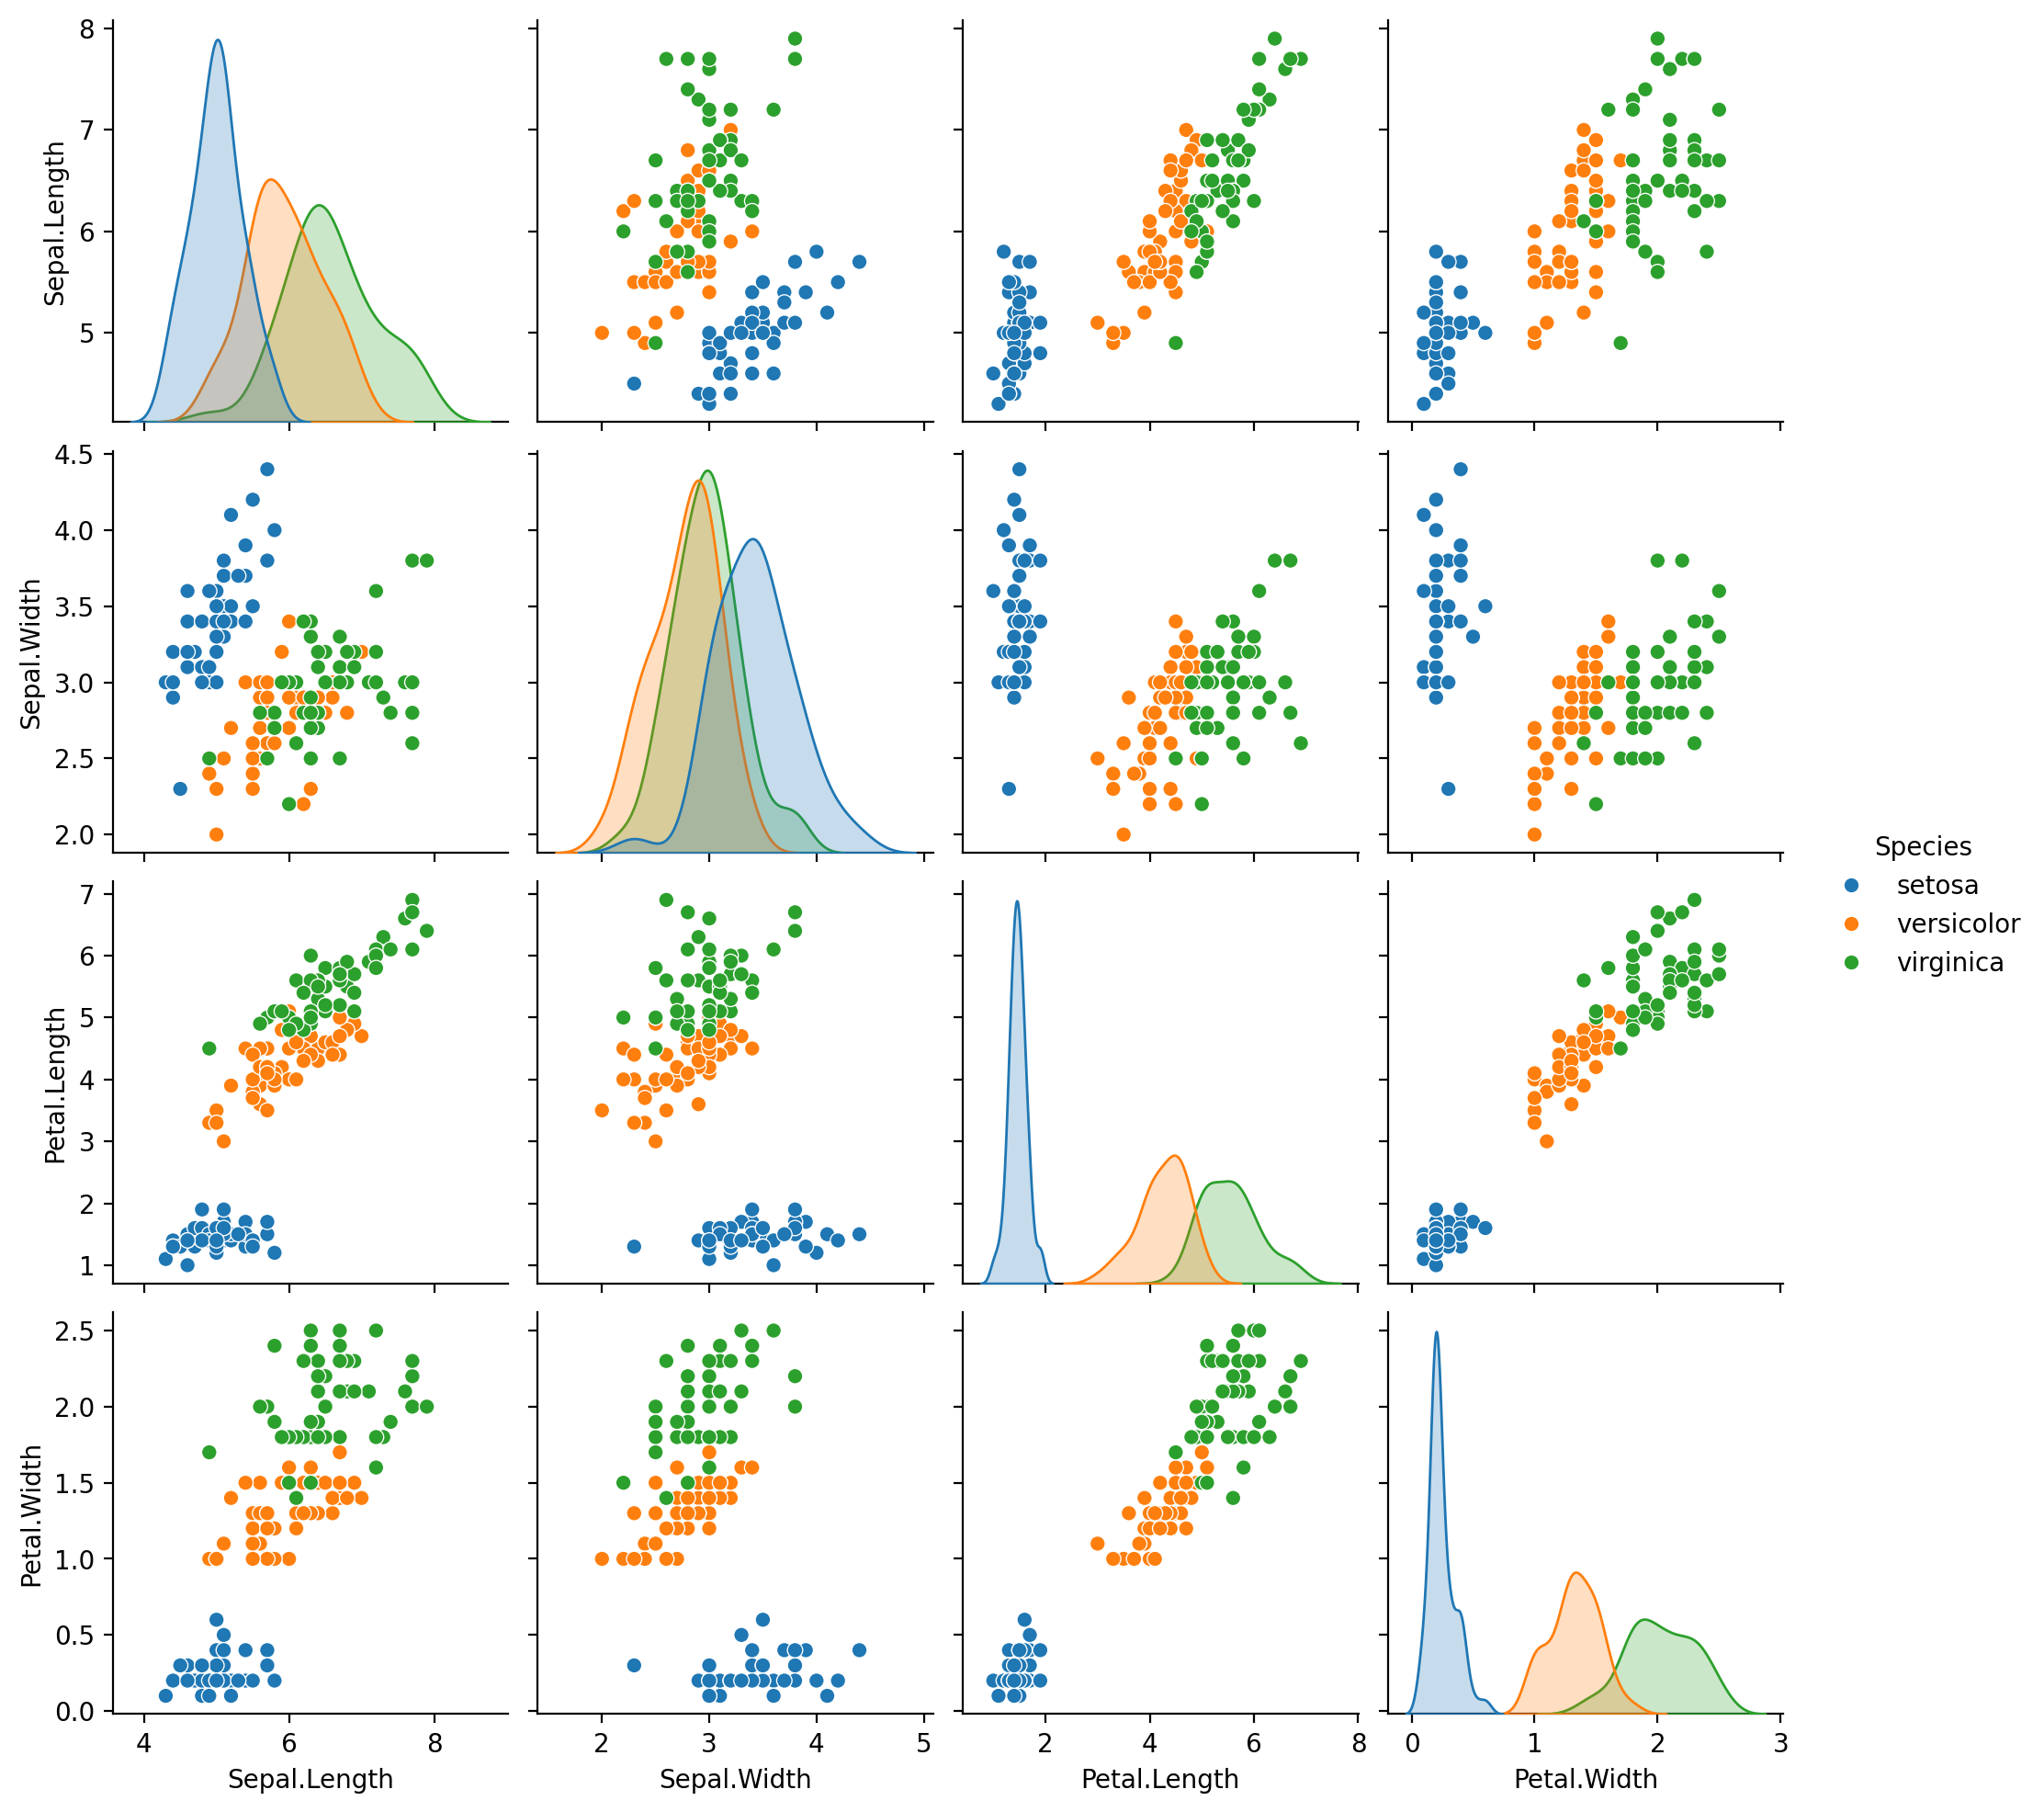

In [58]:
sns.pairplot(iris, hue='Species')
plt.show()

### **3.4. Count Plot**

- **countplot()** 함수는 범주형 변수의 빈도를 막대 그래프로 시각화하는 함수입니다.
- 주어진 데이터셋에서 각 범주의 개수를 계산하고 막대 그래프를 그려줍니다.
- hue 매개변수를 사용하여 특정 범주형 변수를 기준으로 구분해 표시할 수 있습니다.
- order와 hue_order 매개변수를 사용하여 막대 그래프에 그려질 범주의 순서를 지정할 수 있습니다.


- Embarked 변수의 범줏값이 몇 개씩 포함되어 있는지 확인해 봅니다.

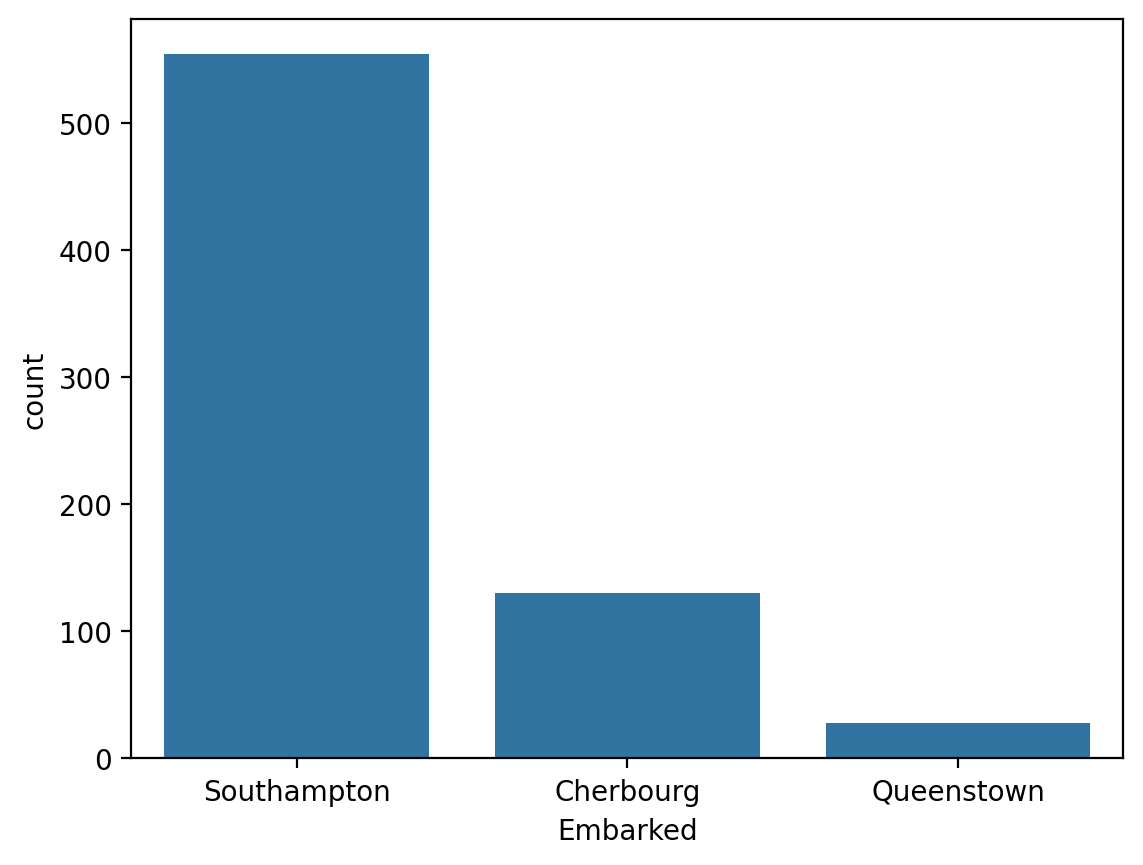

In [59]:
sns.countplot(x='Embarked', data=titanic)
plt.show()

- hue 옵션에 Survived 변수를 지정해 생존 여부로 구분해 봅니다.

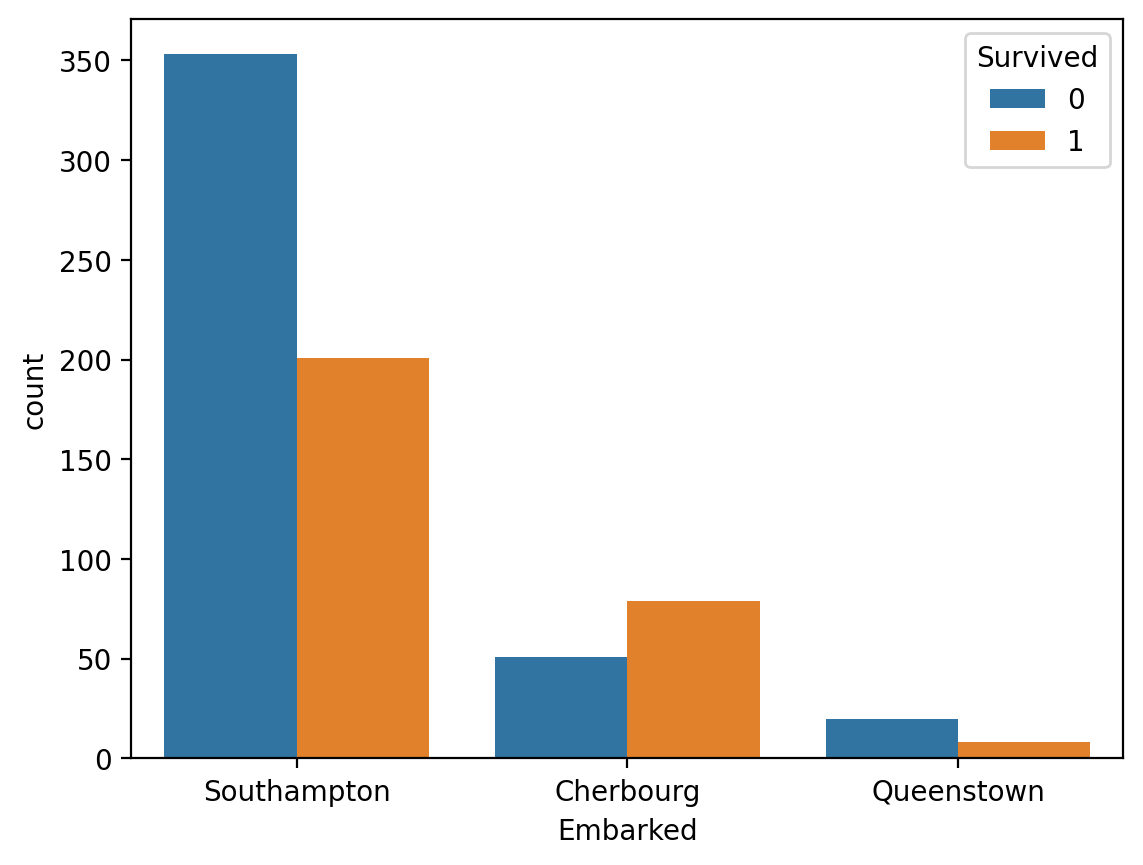

In [60]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.show()

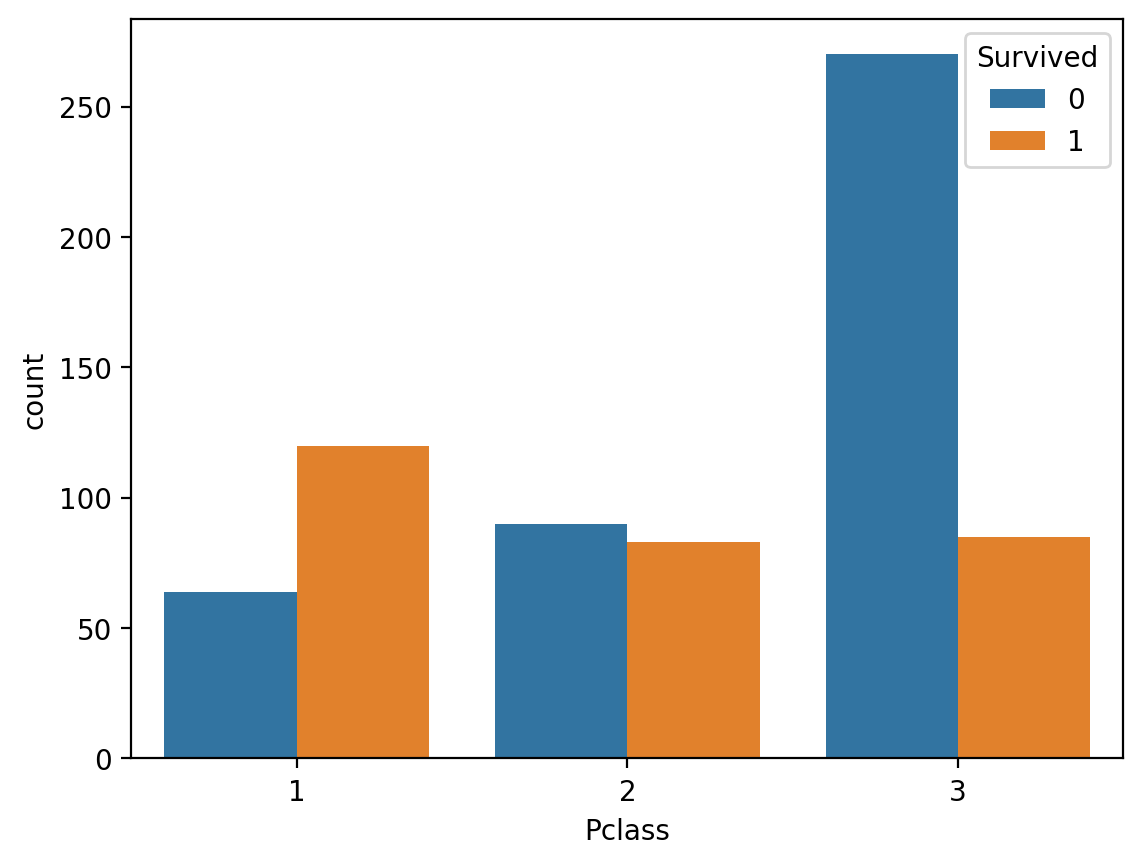

In [64]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.show()

### **3.5. Bar Plot**

- **barplot()** 함수는 범주형 변수에 대한 막대 그래프를 그리는 함수입니다.
- barplot() 함수는 데이터를 추정하고 오차 막대를 표시할 수 있습니다.
- 이 오차 막대는 각 범주의 **평균**과 **신뢰 구간**을 시각화하는 데 사용됩니다.
- hue 매개변수를 사용하여 특정 범주형 변수를 기준으로 구분해 표시할 수 있습니다.
- 예를 들어, hue 매개변수를 사용하여 다른 집단에 대한 데이터를 시각적으로 구분할 수 있습니다.
- barplot() 함수는 기본적으로 평균값을 계산하고 오차 막대를 그립니다.
- 필요하다면 estimator 매개변수를 사용하여 다른 추정값을 지정할 수 있습니다.
- 예를 들어, estimator=np.median를 사용하여 중앙값을 계산할 수 있습니다.

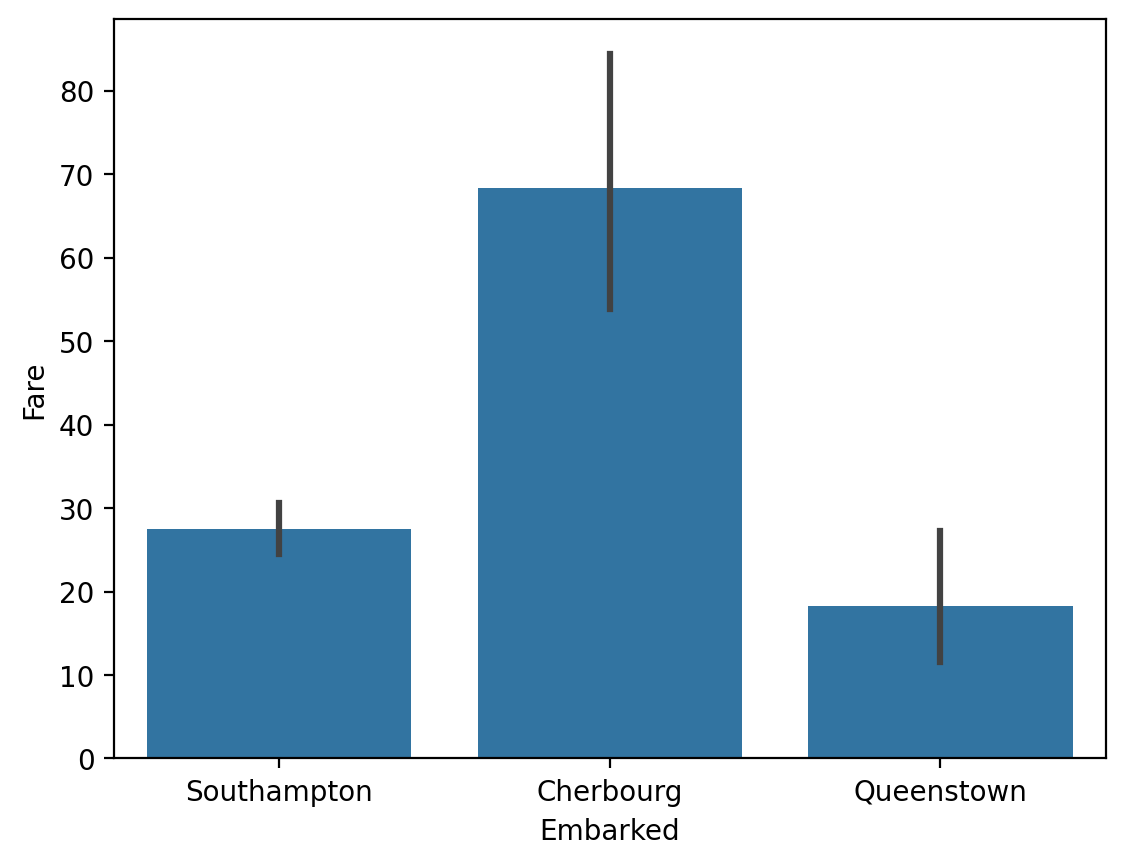

In [70]:
sns.barplot(x='Embarked', y='Fare', data=titanic, errorbar=('ci',95), n_boot=5000)
plt.show()

### **3.6. Heatmap**

- **heatmap()** 함수는 두 범주형 변수를 집계한 결과를 색의 농도 차이로 표시합니다.
- 이를 위해서 집계(groupby)와 피봇(pivot)을 먼저 만들어 줘야 합니다.
- 여러 범줏값을 갖는 변수를 비교할 때 유용합니다.
- Embarked 별 Pclass 별 탑승자 수를 표시해 봅니다.

In [71]:
temp1 = titanic.groupby(['Embarked', 'Pclass'], as_index=False)['PassengerId'].count()
temp1

,Embarked,Pclass,PassengerId
0,Cherbourg,1,74
1,Cherbourg,2,15
2,Cherbourg,3,41
3,Queenstown,1,2
4,Queenstown,2,2
5,Queenstown,3,24
6,Southampton,1,108
7,Southampton,2,156
8,Southampton,3,290


In [72]:
temp2 = temp1.pivot(index='Embarked', columns='Pclass', values='PassengerId')
temp2

Pclass,1,2,3
Embarked,,,
Cherbourg,74,15,41
Queenstown,2,2,24
Southampton,108,156,290


Pclass,1,2,3
Embarked,,,
Cherbourg,74,15,41
Queenstown,2,2,24
Southampton,108,156,290


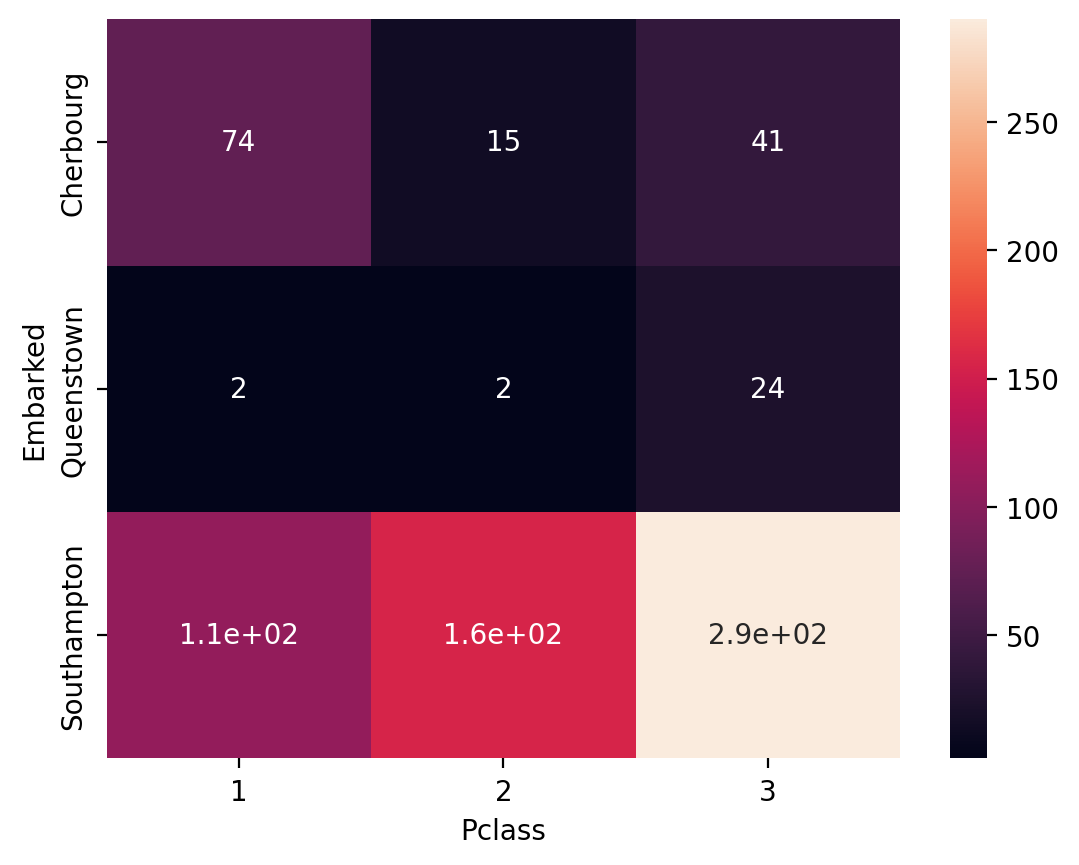

In [62]:
temp1 = titanic.groupby(['Embarked', 'Pclass'], as_index=False)['PassengerId'].count()
temp2 = temp1.pivot(index='Embarked', columns='Pclass', values='PassengerId')
display(temp2)

sns.heatmap(temp2, annot=True)
plt.show()

- 표시되는 값을 정수로, 구간 간격을 조금 벌려봅니다.
- 색상도 다르게 지정해 봅니다.

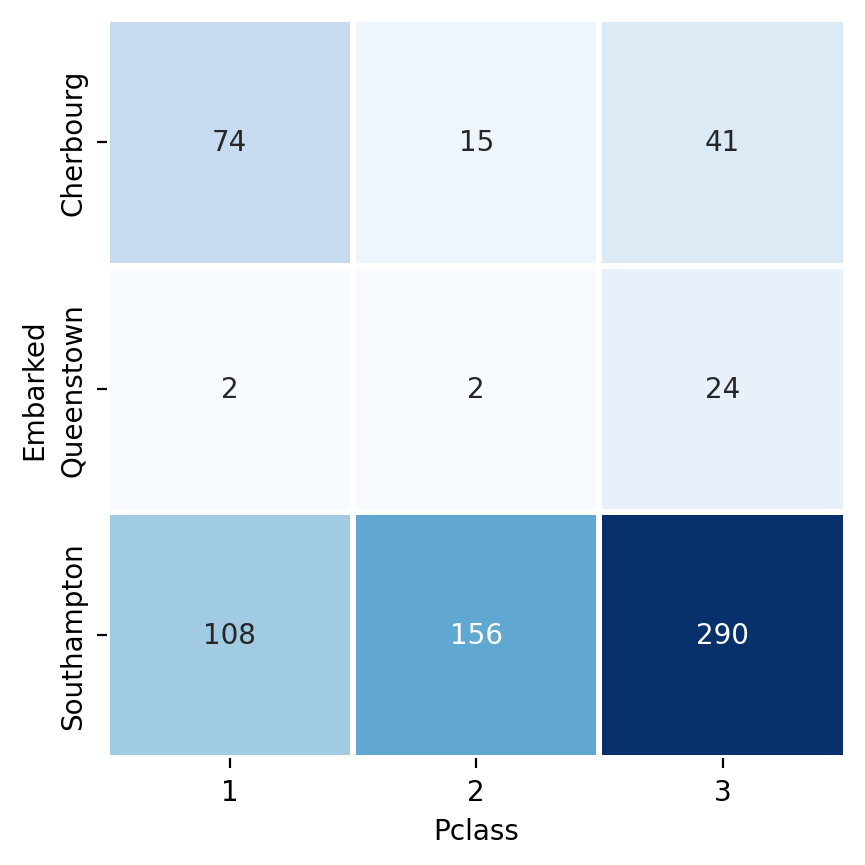

In [76]:
sns.heatmap(temp2, 
            annot=True,  # 숫자 표시
            fmt='d',     # 표시 형식 지정
            linewidth=2, 
            cmap='Blues',
            cbar=False,  # 색상바 표시 안함
            square=True) # 정사각형으로 표시
plt.show()